$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 2: Neural Network Regression

Shashank Satyanarayana (CSU ID: 831-070-563)

## Overview

The goal of this assignment is to learn about object-oriented programming in python and to gain some experience in comparing different sized neural networks when applied to a data set.

We begin with the ```Neural Network``` code given by Prof. Chuck Anderson for CSU CS-445 Intro to Machine Learning, understand the code and create a new version of the same code for the requirements specified. Then we apply the modified code to a sample dataset and 2 additional datasets, and finally discuss the results 

## Code

In this section we utilise 2 unique classes:
* ```neuralnetworks.py```
* ```mlutilities.py```

These classes have been defined in [Lecture Notes 09](http://nbviewer.jupyter.org/url/www.cs.colostate.edu/~anderson/cs445/notebooks/09%20Scaled%20Conjugate%20Gradient%20for%20Training%20Neural%20Networks.ipynb). The files are downloaded in the appropriate directory and examples are simulated to ensure that the codes are functional.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
import neuralnetworks as nn

X = np.arange(10).reshape((-1,1))
T = np.sin(X)

nnet = nn.NeuralNetwork(1, [10], 1)
nnet.train(X, T, 100, verbose=True)
nnet

SCG: Iteration 10 fValue Eval 0.172317869234 Scale 0.00182253719871
SCG: Iteration 20 fValue Eval 0.0862281602735 Scale 1.42385718649e-05
SCG: Iteration 30 fValue Eval 0.0629145648508 Scale 0.000455634299678
SCG: Iteration 40 fValue Eval 0.0168990727331 Scale 1.77982148312e-06
SCG: Iteration 50 fValue Eval 0.0060876843443 Scale 3.47621383421e-09
SCG: Iteration 60 fValue Eval 0.00346758641664 Scale 3.39474007247e-12
SCG: Iteration 70 fValue Eval 0.0010323787887 Scale 6.63035170405e-15
SCG: Iteration 80 fValue Eval 0.000691837568164 Scale 1e-15
SCG: Iteration 90 fValue Eval 0.000246247909314 Scale 1e-15
SCG: Iteration 100 fValue Eval 0.000162516735909 Scale 1e-15


NeuralNetwork(1, [10], 1)
   Network was trained for 101 iterations that took 0.0870 seconds. Final error is 0.01274820520342194.

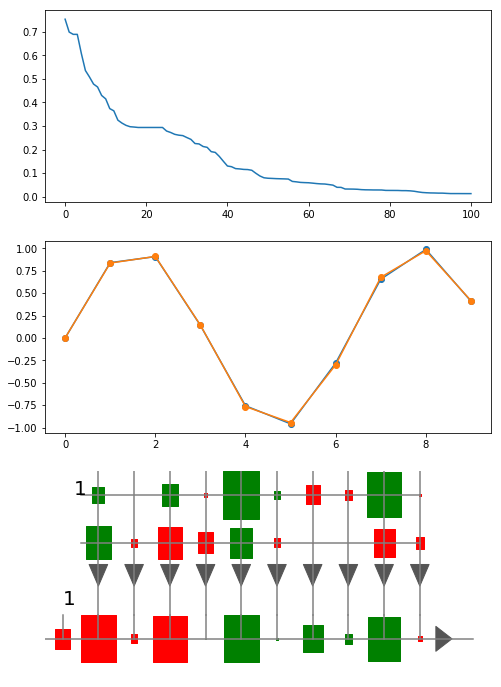

In [3]:
plt.figure(figsize=(8, 12))
plt.subplot(3, 1, 1)
plt.plot(nnet.getErrors())

plt.subplot(3, 1, 2)
plt.plot(X, T, 'o-', label='Actual')
plt.plot(X, nnet.use(X), 'o-', label='Predicted')

plt.subplot(3, 1, 3)
nnet.draw()

### Creating a New Version

A copy of the *neuralnetworks.py* file is created and named as *neuralnetworksA2.py*. The parts of the neural network code that refer to the activation function and its derivative are extracted. We modify the code by defining two new methods: 

    def activation(self, weighted_sum):
        return np.tanh(weighted_sum)
        
    def activationDerivative(self, activation_value):
        return 1 - activation_value * activation_value
        
We now replace the following commands at the appropriate places:
* ```np.tanh``` is replaced with the call function ```self.activation```
* The derivative of ```tanh``` is replaced by the call function ```self.activationderivative```

*neuralnetworksA2.py* is imported as nn2 and some test cases are simulated to ensure that the code is functional.

In [4]:
import neuralnetworksA2 as nn2

nnet = nn2.NeuralNetwork(1, [10], 1)

In [5]:
[nnet.activation(s) for s in [-2, -0.5, 0, 0.5, 2]]

[-0.9640275800758169,
 -0.46211715726000974,
 0.0,
 0.46211715726000974,
 0.9640275800758169]

In [6]:
[nnet.activationDerivative(nnet.activation(s)) for s in [-2, -0.5, 0, 0.5, 2]]

[0.070650824853164429,
 0.7864477329659274,
 1.0,
 0.7864477329659274,
 0.070650824853164429]

In [7]:
nnet.train(X, T, 100, verbose=True)
nnet

SCG: Iteration 10 fValue Eval 0.439825585831 Scale 0.004096
SCG: Iteration 20 fValue Eval 0.100287623691 Scale 0.004096
SCG: Iteration 30 fValue Eval 0.0630104911038 Scale 3.2e-05
SCG: Iteration 40 fValue Eval 0.0282695447115 Scale 3.125e-08
SCG: Iteration 50 fValue Eval 0.00775205911614 Scale 6.103515625e-11
SCG: Iteration 60 fValue Eval 0.00466330984267 Scale 1.1920928955078124e-13
SCG: Iteration 70 fValue Eval 0.00253666596006 Scale 1e-15
SCG: Iteration 80 fValue Eval 0.00112803871329 Scale 1e-15
SCG: Iteration 90 fValue Eval 0.000704656792381 Scale 1e-15
SCG: Iteration 100 fValue Eval 0.000567618385938 Scale 1e-15


NeuralNetwork(1, [10], 1)
   Network was trained for 101 iterations that took 0.0934 seconds. Final error is 0.02382474314526435.

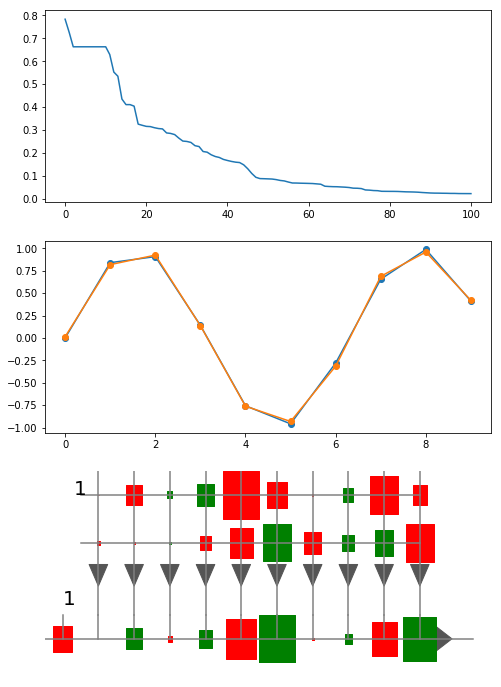

In [8]:
plt.figure(figsize=(8, 12))
plt.subplot(3, 1, 1)
plt.plot(nnet.getErrors())

plt.subplot(3, 1, 2)
plt.plot(X, T, 'o-', label='Actual')
plt.plot(X, nnet.use(X), 'o-', label='Predicted')

plt.subplot(3, 1, 3)
nnet.draw()

## Neural Network Performance with Different Hidden Layer Structures and Numbers of Training Iterations

### Example with Toy Data

#### Study of Hidden Layer Structures
A random example is created and using the new ```NeuralNetwork``` class, we compare the error obtained on a given data set by looping over various hidden layer structures.  

In [9]:
import random

nRows = X.shape[0]
rows = np.arange(nRows)
np.random.shuffle(rows)
nTrain = int(nRows * 0.8)
trainRows = rows[:nTrain]
testRows = rows[nTrain:]
Xtrain, Ttrain = X[trainRows, :], T[trainRows, :]
Xtest, Ttest = X[testRows, :], T[testRows, :]

In [10]:
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((8, 1), (8, 1), (2, 1), (2, 1))

In [11]:
def rmse(A, B):
    return np.sqrt(np.mean((A - B)**2))

hiddens = [0, [1], [1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 1], [5], [5, 5], [5, 5, 5], [5, 5, 5, 5], [5, 5, 5, 5, 5], [10], [10, 10], [10, 10, 10], [10, 10, 10, 10], [10, 10, 10, 10, 10], [20], [20, 20], [20, 20, 20], [20, 20, 20, 20], [20, 20, 20, 20, 20], [50], [50, 50], [50, 50, 50], [50, 50, 50, 50], [50, 50, 50, 50, 50]]
                       0             1         2
0                      0  6.735651e-01  0.669614
1                    [1]  6.274944e-01  0.596940
2                 [1, 1]  5.314953e-01  0.799102
3              [1, 1, 1]  5.314953e-01  0.799102
4           [1, 1, 1, 1]  5.314953e-01  0.799102
5        [1, 1, 1, 1, 1]  5.314953e-01  0.799101
6                    [5]  7.315529e-15  0.633644
7                 [5, 5]  3.758339e-14  0.662044
8              [5, 5, 5]  3.264000e-14  0.634921
9           [5, 5, 5, 5]  1.185126e-14  0.656334
10       [5, 5, 5, 5, 5]  4.101303e-15  0.649732
11                  [10]  4.787052e-15  0.678729
12              [10, 10]  5.9

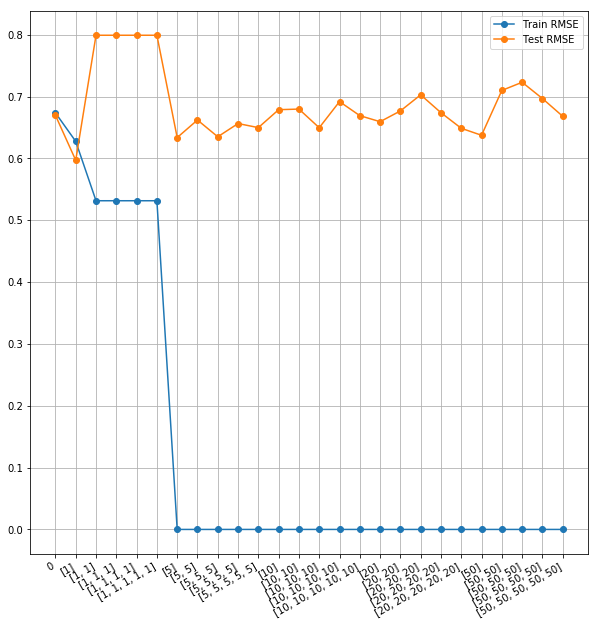

In [12]:
errors = []
hiddens = [0] + [[nu] * nl for nu in [1, 5, 10, 20, 50] for nl in [1, 2, 3, 4, 5]]
print('hiddens =', hiddens)
for hids in hiddens: 
    nnet = nn.NeuralNetwork(Xtrain.shape[1], hids, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, 500)
    errors.append([hids, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errors = pd.DataFrame(errors)
print(errors)
best=errors[0][np.argmin(errors[2])]
print('The Best Hidden Layer Structure for this experiment is:',best)

plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), hiddens, rotation=30, horizontalalignment='right')
plt.grid(True)

#### Study of Training Iterations
For this sample data (and the random shuffling of the data used when this notebook was run), `[1]` produced the lowest test error.  

Now, using the best hidden layer structure obtained, we try to study the Optimum Number of Training Iterations required. Note that these numbers vary with every experiment. 

Best Hidden Layer Structure: [1]
[10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
      0         1         2
0    10  0.561003  0.815791
1    20  0.544991  0.819046
2    50  0.533452  0.808180
3   100  0.531658  0.800063
4   150  0.531533  0.799344
5   200  0.627495  0.596944
6   250  0.627494  0.596940
7   300  0.531500  0.799147
8   350  0.531499  0.799125
9   400  0.531508  0.799191
10  450  0.531501  0.799153
11  500  0.531501  0.799142
The Optimum number of iterations for this experiment is: 250


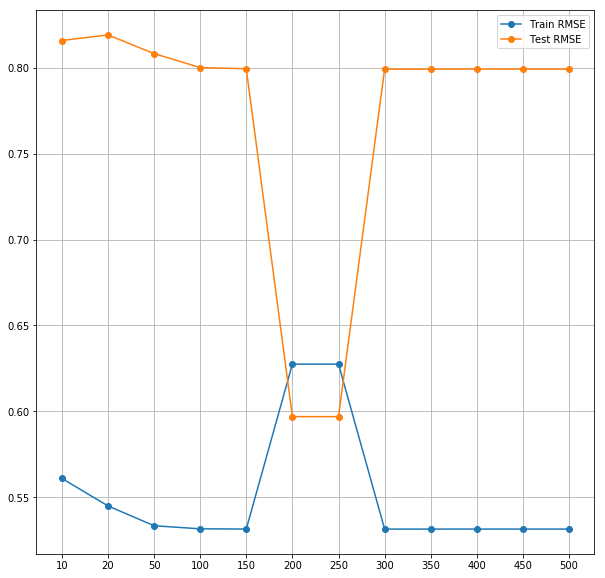

In [13]:
errors = []
nIterationsList=[10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
hiddens = best
print('Best Hidden Layer Structure:', hiddens)
for iters in nIterationsList: 
    nnet = nn.NeuralNetwork(Xtrain.shape[1], hiddens, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, iters)
    errors.append([iters, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errors = pd.DataFrame(errors)

print(nIterationsList)
print(errors)
bestIteration=errors[0][np.argmin(errors[2])]
print('The Optimum number of iterations for this experiment is:',bestIteration)
plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), nIterationsList) # , rotation=30, horizontalalignment='right')
plt.grid(True)

### Results
For the given dataset, when the notebook was run the following optimum parameters were achieved: 
* Best Hidden Layer Structure: [1]
* Optimum Number of Iterations: 250 

### Experiments wtih Automobile Data

The above steps are repeated with the [Automobile MPG Dataset](https://archive.ics.uci.edu/ml/datasets/auto+mpg) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) we have used before in class. The experiment is performed with the following conditions: 

  * cylinders,
  * displacement,
  * weight,
  * acceleration,
  * year, and
  * origin
  
as input variables, and

  * mpg
  * horsepower
  
as output variables.

The dataset can be dowloaded with the following curl command

In [14]:
!curl -O http://mlr.cs.umass.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
!curl -O http://mlr.cs.umass.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30286  100 30286    0     0  30286      0  0:00:01 --:--:--  0:00:01 91775
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1660  100  1660    0     0   1660      0  0:00:01 --:--:--  0:00:01  9707


The dataset is known to have some ```Nan``` values. We will first need to remove all the rows containing these values before proceeding with the experiment. 

In [15]:
def missingIsNan(s):
    return np.nan if s == b'?' else float(s)
data = np.loadtxt('auto-mpg.data', usecols=range(8), converters={3: missingIsNan})
data.shape

(398, 8)

It appears that the ```Nan``` values are present in the 4th column (Horsepower) of the dataset. We then proceed to delete all data rows containing these values. 

In [16]:
np.sum(np.isnan(data),axis=0)

array([0, 0, 0, 6, 0, 0, 0, 0])

In [17]:
goodRowsMask = np.logical_not(np.isnan(data).any(axis=1))
dataNew=data[goodRowsMask,:]
dataNew.shape

(392, 8)

In [18]:
names =  ['mpg','cylinders','displacement','horsepower','weight',
          'acceleration','year','origin']

In [19]:
X = dataNew[:, [1, 2, 4, 5, 6, 7]]
T = dataNew[:, [0, 3]] 
Xnames = [names[1:3]+names[4:8]]
Tnames = [names[0], names[3]]
X.shape, Xnames, T.shape, Tnames

((392, 6),
 [['cylinders', 'displacement', 'weight', 'acceleration', 'year', 'origin']],
 (392, 2),
 ['mpg', 'horsepower'])

In [20]:
nRows = X.shape[0]
rows = np.arange(nRows)
np.random.shuffle(rows)
nTrain = int(nRows * 0.8)
trainRows = rows[:nTrain]
testRows = rows[nTrain:]
Xtrain, Ttrain = X[trainRows, :], T[trainRows, :]
Xtest, Ttest = X[testRows, :], T[testRows, :]

#### Study of Hidden Layer Structures
A random example is created and using the new ```NeuralNetwork``` class, we compare the error obtained on a given data set by looping over various hidden layer structures.  

hiddens = [0, [1], [1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 1], [5], [5, 5], [5, 5, 5], [5, 5, 5, 5], [5, 5, 5, 5, 5], [10], [10, 10], [10, 10, 10], [10, 10, 10, 10], [10, 10, 10, 10, 10], [20], [20, 20], [20, 20, 20], [20, 20, 20, 20], [20, 20, 20, 20, 20], [50], [50, 50], [50, 50, 50], [50, 50, 50, 50], [50, 50, 50, 50, 50]]
                       0          1          2
0                      0   8.653356  10.069511
1                    [1]  10.852531  12.190212
2                 [1, 1]  10.869688  12.216309
3              [1, 1, 1]  10.894620  12.253532
4           [1, 1, 1, 1]  10.909415  12.284017
5        [1, 1, 1, 1, 1]  10.909171  12.274173
6                    [5]   6.446089   9.436757
7                 [5, 5]   5.731472   8.978901
8              [5, 5, 5]   5.745981   9.084836
9           [5, 5, 5, 5]   5.816130   9.492487
10       [5, 5, 5, 5, 5]   5.744564   9.773734
11                  [10]   5.634199   9.923877
12              [10, 10]   4.189057   9.684313
13      

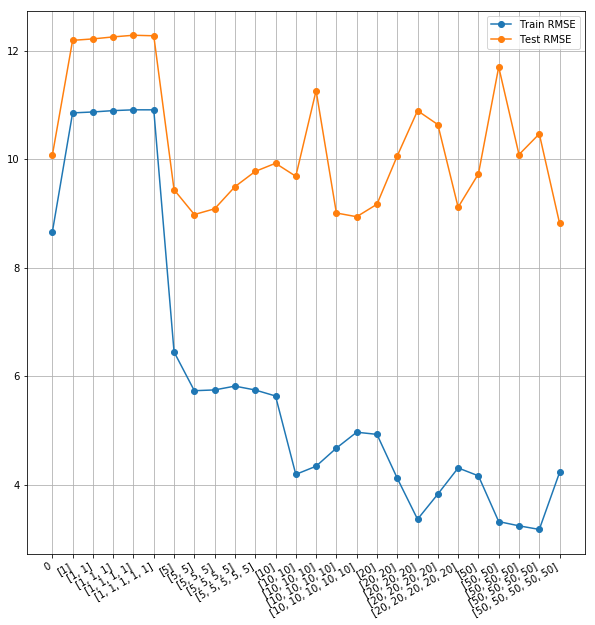

In [21]:
errors = []
hiddens = [0] + [[nu] * nl for nu in [1, 5, 10, 20, 50] for nl in [1, 2, 3, 4, 5]]
print('hiddens =', hiddens)
for hids in hiddens: 
    nnet = nn.NeuralNetwork(Xtrain.shape[1], hids, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, 500)
    errors.append([hids, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errors = pd.DataFrame(errors)
print(errors)
best=errors[0][np.argmin(errors[2])]
print('The Best Hidden Layer Structure for this experiment is:',best)

plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), hiddens, rotation=30, horizontalalignment='right')
plt.grid(True)

#### Study of Training Iterations
For this sample data (and the random shuffling of the data used when this notebook was run), `[50,50,50,50,50]` produced the lowest test error.  

Now, using the best hidden layer structure obtained, we try to study the Optimum Number of Training Iterations required. Note that these numbers vary with every experiment. 

Best Hidden Layer Structure: [50, 50, 50, 50, 50]
[10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
      0          1          2
0    10  19.741339  23.075592
1    20   8.219793  10.161273
2    50   7.119896  10.175846
3   100   6.572106   9.694627
4   150   5.547321   8.839422
5   200   5.096136   8.555814
6   250   4.920247   8.391660
7   300   5.197122   8.553535
8   350   4.675938   8.705583
9   400   4.543877   7.786938
10  450   4.626431   8.993340
11  500   4.123976   9.612058
The Optimum number of iterations for this experiment is: 400


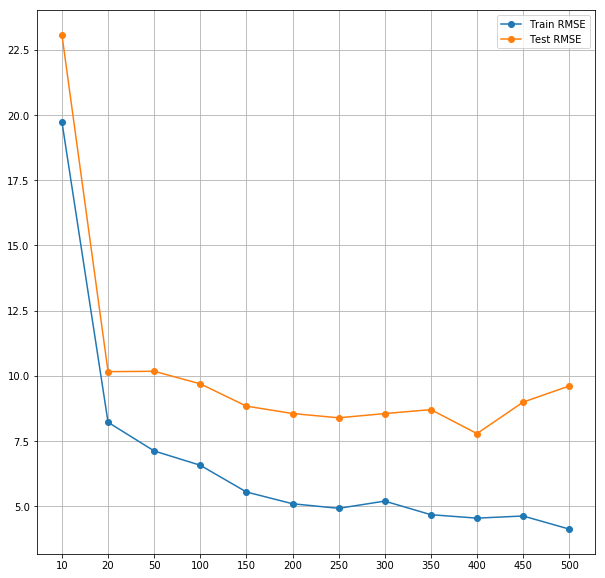

In [22]:
errors = []
nIterationsList=[10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
hiddens = best
print('Best Hidden Layer Structure:', hiddens)
for iters in nIterationsList: 
    nnet = nn.NeuralNetwork(Xtrain.shape[1], hiddens, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, iters)
    errors.append([iters, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errors = pd.DataFrame(errors)

print(nIterationsList)
print(errors)
bestIteration=errors[0][np.argmin(errors[2])]
print('The Optimum number of iterations for this experiment is:',bestIteration)
plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), nIterationsList) # , rotation=30, horizontalalignment='right')
plt.grid(True)

### Results
For the given dataset, when the notebook was run the following optimum parameters were achieved: 
* Best Hidden Layer Structure: [50,50,50,50,50]
* Optimum Number of Iterations: 400

## Grading and Check-in

The [A2grader.tar](http://www.cs.colostate.edu/~anderson/cs445/notebooks/A2grader.tar) was downloaded and  `A2grader.py`was extracted from it. Executing the following code cell demonstrates an example grading session. 

In [23]:
%run -i A2grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Satyanarayana-A2.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing  import neuralnetworksA2 as nn

--- 10/10 points. The statement  import neuralnetworksA2 as nn  works.

Testing nnet = nn.NeuralNetwork(1, 10, 1)

--- 10/10 points. nnet correctly constructed

Testing a = nnet.activation(-0.8)

--- 10/10 points. activation of -0.6640367702678491 is correct.

Testing da = nnet.activationDerivative(-0.664)

--- 10/10 points. activationDerivative of 0.5591039999999999 is correct.

Testing X = np.arange(300).reshape((-1, 3))
        T = X[:,0:2] + 0.1 * X[:,1:2] * X[:,2:3]
        import neuralnetworksA2 as nn
        nnet = nn.NeuralNetwork(3, [20, 10], 2)
        nnet.train(X, T, 100)
        error = np.sqrt(np.mean((T - nnet.use(X))**2))

--- 20/20 points. The error of 1.5899004779097299 is correct.

In

## Extra Credit

Additionally, we repeated the above experiment using a new dataset ```energydata_complete.csv``` downloaded from the [Appliances energy prediction Data Set ](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction) at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml). 

This dataset consists of 29 different attributes that were recorded at an interval of 10 mins in a particualr building over a period of 4.5 months accounting to  a total of 19735 samples.The sample attributes are as follows:
- date time year-month-day hour:minute:second
- Appliances, energy use in Wh
- lights, energy use of light fixtures in the house in Wh
- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in %
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in %
- T6, Temperature outside the building (north side), in Celsius
- RH_6, Humidity outside the building (north side), in %
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in %
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in %
- T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in %
- To, Temperature outside (from Chievres weather station), in Celsius
- Pressure (from Chievres weather station), in mm Hg
- RH_out, Humidity outside (from Chievres weather station), in %
- Wind speed (from Chievres weather station), in m/s
- Visibility (from Chievres weather station), in km
- Tdewpoint (from Chievres weather station), Â°C
- rv1, Random variable 1, nondimensional
- rv2, Random variable 2, nondimensional 

The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). 

For this experiment, we ignore the first column (date and time), use the next two columns as target variables, and use all but the last two columns (named rv1 and rv2) as input variables. 

### Loading of Data

In [24]:
import csv
def loadData(filename):
    f = open(filename,"r")
    header = f.readline()
    names = header.replace('"','').split(',')[1:27]
    data = np.array(list(csv.reader(f)))
    data=data[:(data.shape[0]),1:(data.shape[1]-2)]
    Xenergy=data[:,2:].astype(float)
    Xnames =header.replace('"','').split(',')[3:27]
    Tenergy=data[:,:2].astype(float)
    Tnames = header.replace('"','').split(',')[1:3]
    data=data.astype(np.float)
    return names,data, Xenergy, Xnames, Tenergy, Tnames

In [25]:
names,data,Xenergy,Xnames,Tenergy,Tnames=loadData('energydata_complete.csv')

In [26]:
names, Xenergy.shape, Xnames,Tenergy.shape, Tnames

(['Appliances',
  'lights',
  'T1',
  'RH_1',
  'T2',
  'RH_2',
  'T3',
  'RH_3',
  'T4',
  'RH_4',
  'T5',
  'RH_5',
  'T6',
  'RH_6',
  'T7',
  'RH_7',
  'T8',
  'RH_8',
  'T9',
  'RH_9',
  'T_out',
  'Press_mm_hg',
  'RH_out',
  'Windspeed',
  'Visibility',
  'Tdewpoint'],
 (19735, 24),
 ['T1',
  'RH_1',
  'T2',
  'RH_2',
  'T3',
  'RH_3',
  'T4',
  'RH_4',
  'T5',
  'RH_5',
  'T6',
  'RH_6',
  'T7',
  'RH_7',
  'T8',
  'RH_8',
  'T9',
  'RH_9',
  'T_out',
  'Press_mm_hg',
  'RH_out',
  'Windspeed',
  'Visibility',
  'Tdewpoint'],
 (19735, 2),
 ['Appliances', 'lights'])

In [27]:
nRows = Xenergy.shape[0]
rows = np.arange(nRows)
np.random.shuffle(rows)
nTrain = int(nRows * 0.8)
trainRows = rows[:nTrain]
testRows = rows[nTrain:]
Xtrain, Ttrain = Xenergy[trainRows, :], Tenergy[trainRows, :]
Xtest, Ttest = Xenergy[testRows, :], Tenergy[testRows, :]

#### Study of Hidden Layer Structures
A random example is created and using the new ```NeuralNetwork``` class, we compare the error obtained on a given data set by looping over various hidden layer structures.  

hiddens = [0, [1], [1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 1], [5], [5, 5], [5, 5, 5], [5, 5, 5, 5], [5, 5, 5, 5, 5], [10], [10, 10], [10, 10, 10], [10, 10, 10, 10], [10, 10, 10, 10, 10], [20], [20, 20], [20, 20, 20], [20, 20, 20, 20], [20, 20, 20, 20, 20], [50], [50, 50], [50, 50, 50], [50, 50, 50, 50], [50, 50, 50, 50, 50]]
                       0          1          2
0                      0  67.557706  65.630877
1                    [1]  70.722862  68.907836
2                 [1, 1]  70.703816  68.889287
3              [1, 1, 1]  70.693026  68.882633
4           [1, 1, 1, 1]  70.711820  68.894561
5        [1, 1, 1, 1, 1]  70.721308  68.901002
6                    [5]  66.273009  65.210813
7                 [5, 5]  63.708050  64.345866
8              [5, 5, 5]  62.813821  64.666354
9           [5, 5, 5, 5]  63.555698  63.886513
10       [5, 5, 5, 5, 5]  62.078940  64.676370
11                  [10]  63.693274  62.870414
12              [10, 10]  59.174747  61.965741
13      

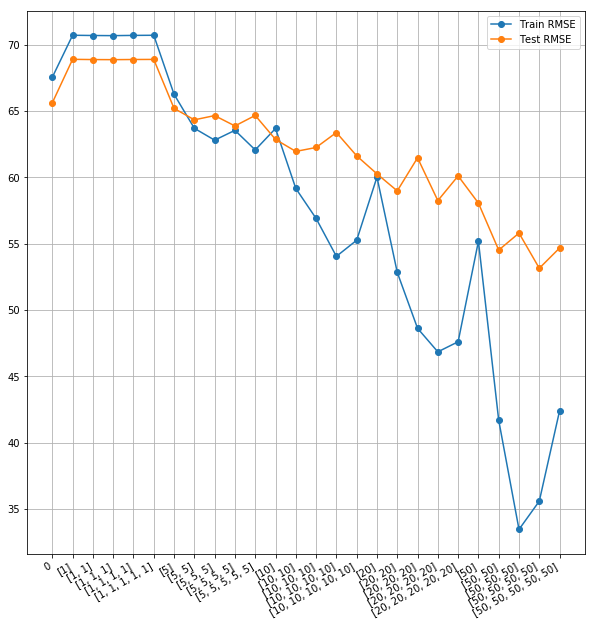

In [28]:
errors = []
hiddens = [0] + [[nu] * nl for nu in [1, 5, 10, 20, 50] for nl in [1, 2, 3, 4, 5]]
print('hiddens =', hiddens)
for hids in hiddens: 
    nnet = nn.NeuralNetwork(Xtrain.shape[1], hids, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, 500)
    errors.append([hids, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errors = pd.DataFrame(errors)
print(errors)
best=errors[0][np.argmin(errors[2])]
print('The Best Hidden Layer Structure for this experiment is:',best)

plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), hiddens, rotation=30, horizontalalignment='right')
plt.grid(True)

#### Study of Training Iterations
For this sample data (and the random shuffling of the data used when this notebook was run), `[50,50,50,50]` produced the lowest test error.  

Now, using the best hidden layer structure obtained, we try to study the Optimum Number of Training Iterations required. Note that these numbers vary with every experiment. 

Best Hidden Layer Structure: [50, 50, 50, 50]
[10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
      0          1          2
0    10  72.422184  69.717813
1    20  68.259121  66.267518
2    50  66.573372  64.762470
3   100  60.936022  61.115272
4   150  57.301300  58.732472
5   200  54.598390  57.470801
6   250  50.269786  56.296854
7   300  50.666679  56.026078
8   350  43.005594  54.350323
9   400  42.124832  53.501987
10  450  39.532620  53.412919
11  500  36.958942  54.873229
The Optimum number of iterations for this experiment is: 450


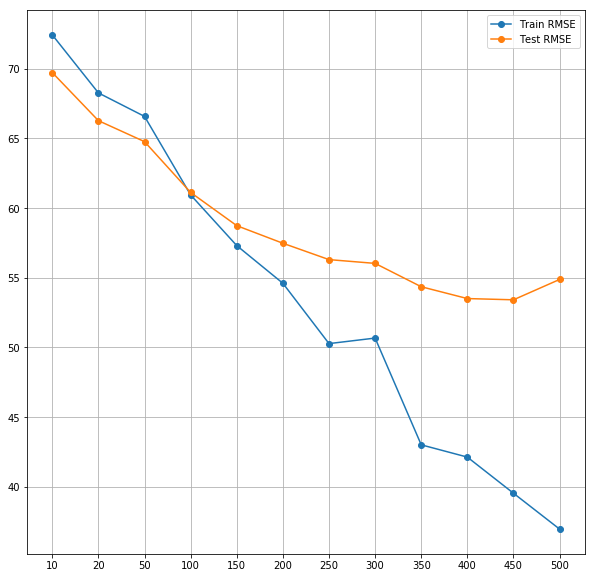

In [29]:
errors = []
nIterationsList=[10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
hiddens = best
print('Best Hidden Layer Structure:', hiddens)
for iters in nIterationsList: 
    nnet = nn.NeuralNetwork(Xtrain.shape[1], hiddens, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, iters)
    errors.append([iters, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errors = pd.DataFrame(errors)

print(nIterationsList)
print(errors)
bestIteration=errors[0][np.argmin(errors[2])]
print('The Optimum number of iterations for this experiment is:',bestIteration)
plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), nIterationsList) # , rotation=30, horizontalalignment='right')
plt.grid(True)

### Results
For the given dataset, when the notebook was run the following optimum parameters were achieved: 
* Best Hidden Layer Structure: [50,50,50,50]
* Optimum Number of Iterations: 450